In [1]:
%matplotlib inline
# general libraries
import sys
import math
import collections
from pylab import MaxNLocator
from collections import defaultdict
import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.spatial.distance import pdist,squareform

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
import matplotlib.pyplot as plt

Importing the Train Numerical Normalized dataset with 15 columns and 883 rows

In [2]:
data_directory = (r'C:\Users\jigok\OneDrive\Desktop\UniPISA\1semestre1Anno\Data Mining\Progetto\DatasetProject1')
plot_directory = "../../plots/data_understanding/"
TR_file = data_directory + '\\Numerical_Normalized_Train_HR_Employee_Attrition.csv'
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"

In [3]:
df = pd.read_csv(TR_file, sep=",")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

In [5]:
del df['Attrition']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [6]:
df.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.292914,0.227927,0.300518,0.264628,0.444319,0.316308,0.244975,0.368545,0.277463,0.440921,0.229898,0.315213,0.471687
std,0.196813,0.294351,0.209842,0.256381,0.288454,0.197971,0.226178,0.214712,0.230461,0.448001,0.178532,0.251877,0.276110,0.252071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.035714,0.079383,0.071429,0.000000,0.333333,0.150000,0.125000,0.185135,0.000000,0.333333,0.000000,0.111111,0.250000
50%,0.404762,0.214286,0.156611,0.214286,0.333333,0.333333,0.250000,0.187500,0.329663,0.000000,0.333333,0.250000,0.222222,0.500000
75%,0.571429,0.464286,0.301351,0.500000,0.333333,0.500000,0.450000,0.437500,0.502469,1.000000,0.666667,0.250000,0.444444,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


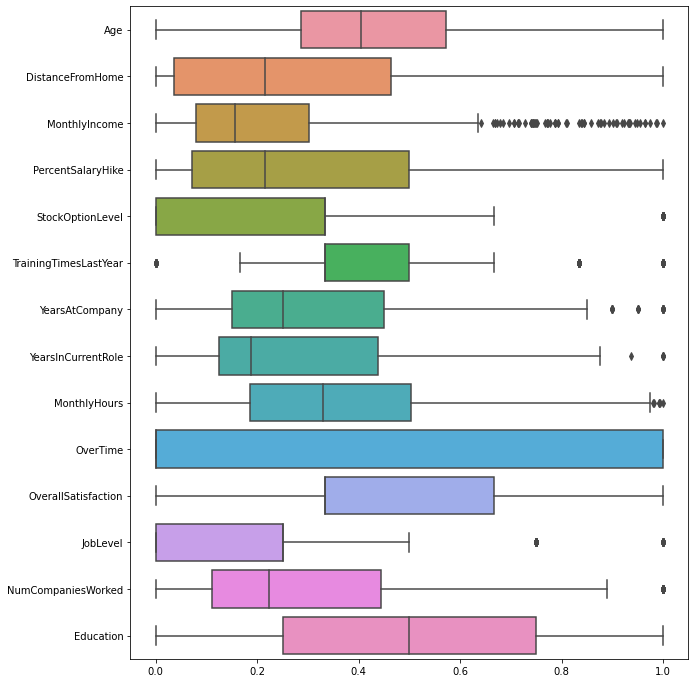

In [7]:
plt.figure(figsize = (10,12))
sns.boxplot(data = df, orient = "h")
plt.show()

# DBSCAN

DBSCAN is a clustering algorithm that is part of the so-called density-based category because it identify areas of the feature space where the density of points (or observations) is greater.
All those observations close to each other are grouped into a cluster. Those that seem isolated are labeled as noise.


DBSCAN needs two hyperparameters:

ε: which corresponds to the distance within which to search for nearby points
n: which corresponds to the minimum number of points for a cluster to form
For the sake of brevity we can say that DBSCAN does nothing but search for all those clusters whose points are a number greater than or equal to and distant from each other less than ε.

Now that we understand what DBSCAN does we can instantiate the model via sklearn. For demonstration purposes in these first lines we try to observe how the hyperparamaters change with an HitMap
:

# Determing Esp and  MinSamples doing the graph with the Euclidean distance

In [8]:
dist = pdist(df,'euclidean')
dist = squareform(dist)
print(dist)

[[0.         1.77761563 1.86415013 ... 1.29357808 1.41428688 1.29002274]
 [1.77761563 0.         1.49104227 ... 1.33756039 1.38026562 1.28778985]
 [1.86415013 1.49104227 0.         ... 1.13259334 1.7023115  1.29822796]
 ...
 [1.29357808 1.33756039 1.13259334 ... 0.         1.46401346 0.42056776]
 [1.41428688 1.38026562 1.7023115  ... 1.46401346 0.         1.38557322]
 [1.29002274 1.28778985 1.29822796 ... 0.42056776 1.38557322 0.        ]]


In [9]:
k = 5
kth_distance =[2]
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distance.append(d[index_kth_distance])

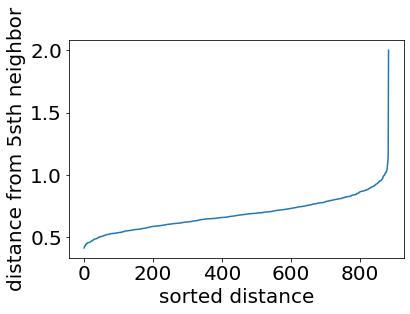

In [10]:
plt.plot(range(0,len(kth_distance)), sorted(kth_distance))
plt.ylabel('distance from 5sth neighbor',fontsize = 20)
plt.xlabel('sorted distance',fontsize = 20)

plt.tick_params(axis ='both', labelsize =20)

# Observing how the metrics change as its hyperparameters change. 

In [11]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 1.5, 0.1)]
min_samples_to_test = range(2, 11, 1)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
MIN_SAMPLES: [2, 3, 4, 5, 6, 7, 8, 9, 10]


In [12]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [13]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [14]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   2 | 0.629    0
  2 | Tested with eps = 0.1 and min_samples =   3 | 0.629    0
  3 | Tested with eps = 0.1 and min_samples =   4 | 0.629    0
  4 | Tested with eps = 0.1 and min_samples =   5 | 0.629    0
  5 | Tested with eps = 0.1 and min_samples =   6 | 0.629    0
  6 | Tested with eps = 0.1 and min_samples =   7 | 0.629    0
  7 | Tested with eps = 0.1 and min_samples =   8 | 0.629    0
  8 | Tested with eps = 0.1 and min_samples =   9 | 0.629    0
  9 | Tested with eps = 0.1 and min_samples =  10 | 0.629    0
 10 | Tested with eps = 0.2 and min_samples =   2 | 0.629    0
 11 | Tested with eps = 0.2 and min_samples =   3 | 0.629    0
 12 | Tested with eps = 0.2 and min_samples =   4 | 0.629    0
 13 | Tested with eps = 0.2 and min_samples =   5 | 0.629    0
 14 | Tested with eps = 0.2 and min_samples =   6

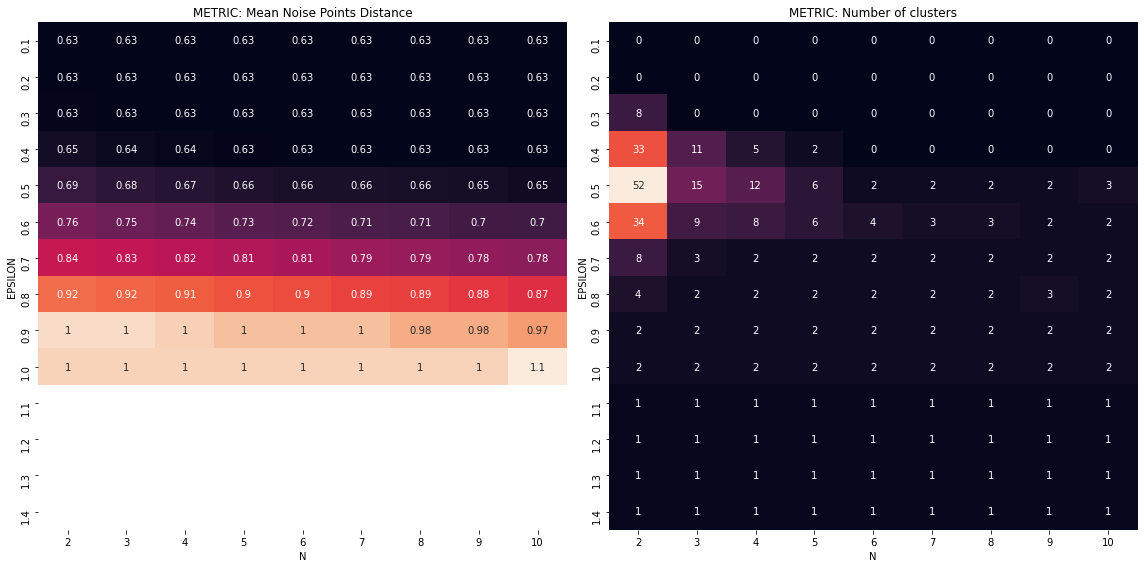

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

# DBSCAN  WITH eps= 0.6  e min= 7

In [16]:
# Compute DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=7).fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 473


In [17]:
dbscan.labels_

array([-1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0,
       -1,  0, -1,  0, -1,  0,  1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0, -1,  0, -1, -1, -1,  0,  1, -1,
       -1, -1,  1, -1, -1, -1,  1,  0,  1, -1,  0,  1, -1,  0, -1,  0, -1,
       -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  1, -1,  0, -1, -1, -1,  1,
       -1,  2, -1,  0,  0, -1,  0,  0, -1,  1, -1,  0,  0,  0, -1,  0,  0,
       -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1,
        0,  1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1,
       -1,  0,  0,  0, -1,  1, -1, -1, -1,  0,  0, -1,  0, -1,  1,  0, -1,
       -1,  0, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0, -1,  0,  1, -1,
        0, -1,  1,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,
       -1,  0,  1, -1, -1,  1,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1,
       -1, -1, -1,  0, -1

In [18]:
np.unique(dbscan.labels_,return_counts = True)

(array([-1,  0,  1,  2], dtype=int64),
 array([473, 337,  67,   6], dtype=int64))

In [19]:
df["LABEL"] = labels

In [20]:
df.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,-1
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,-1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,-1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,0
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,0
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,-1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,-1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,-1


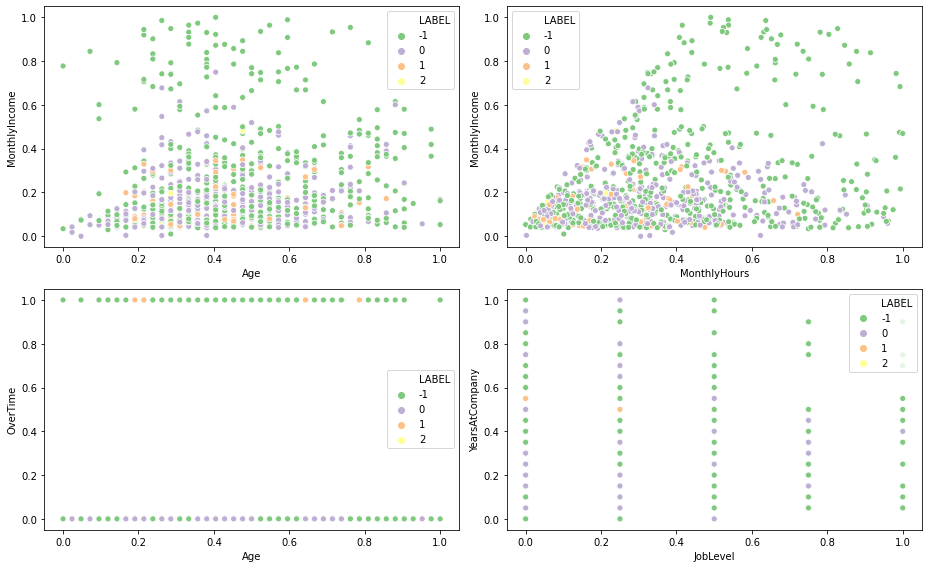

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

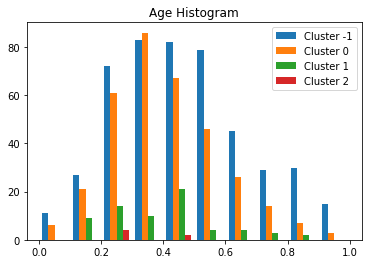

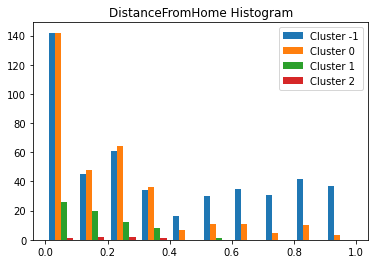

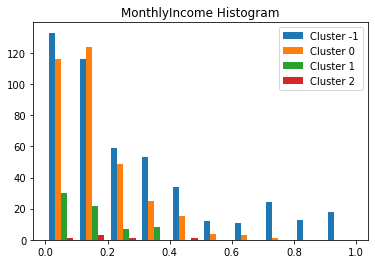

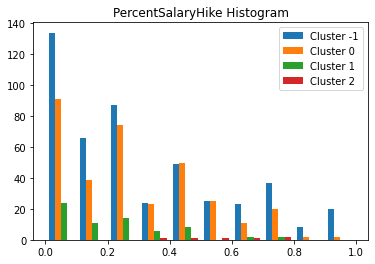

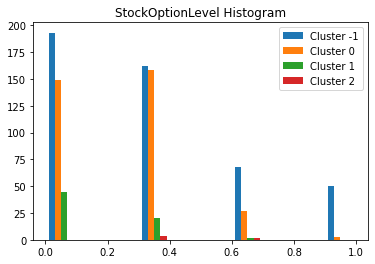

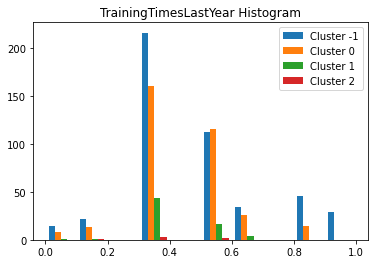

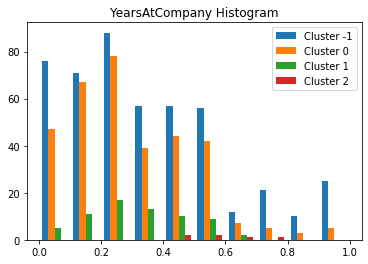

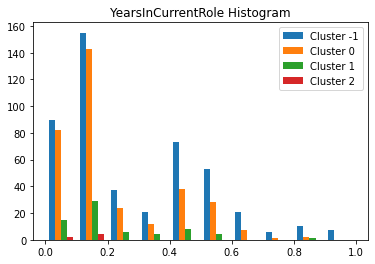

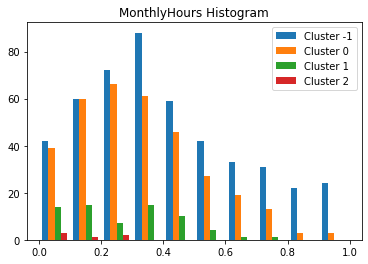

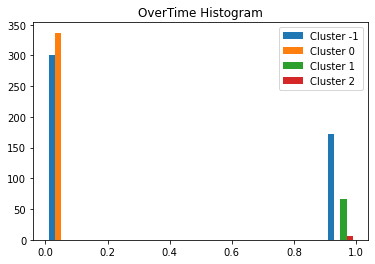

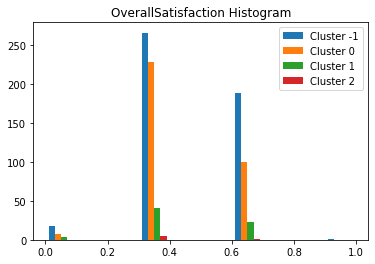

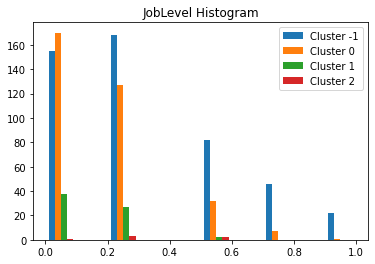

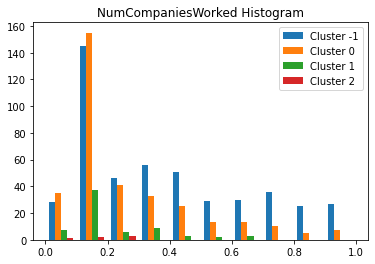

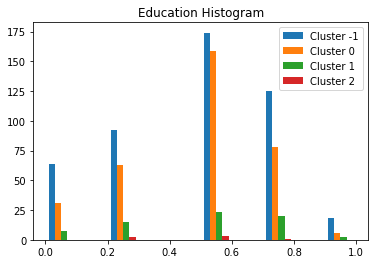

In [82]:
for column in df.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df['LABEL']):
            cluster_list.append(df[df['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

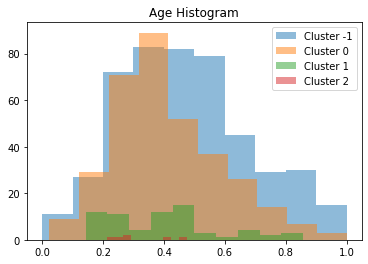

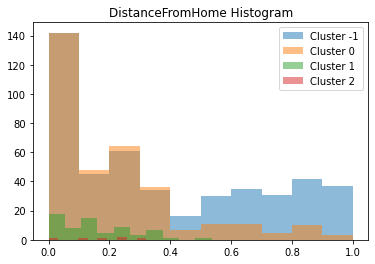

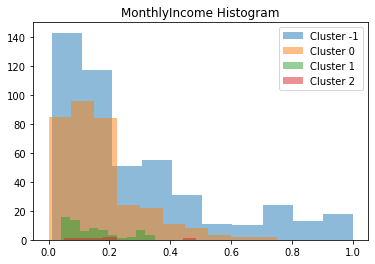

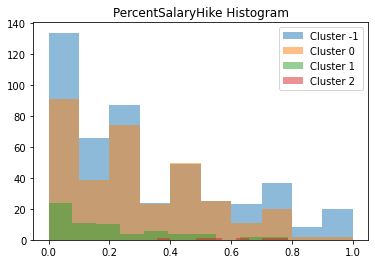

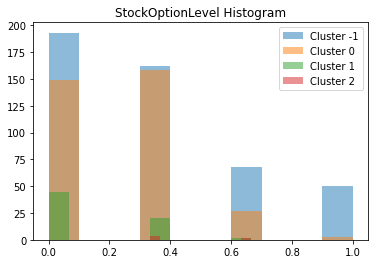

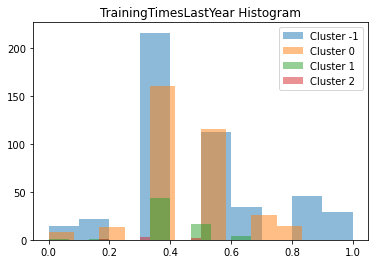

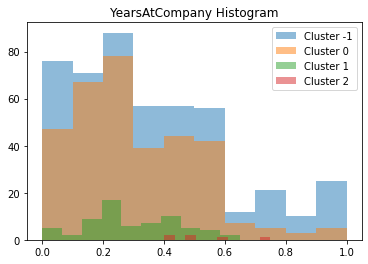

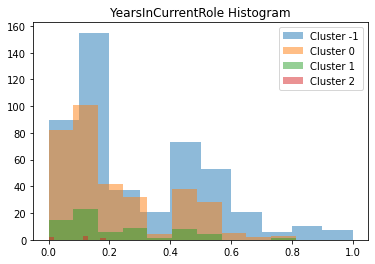

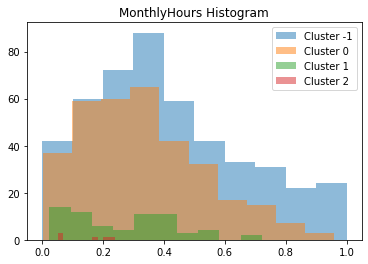

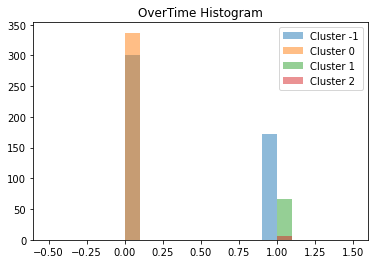

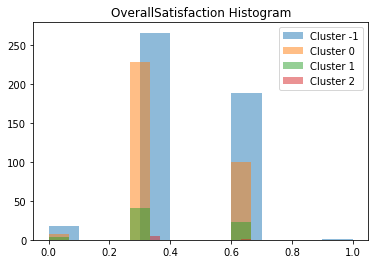

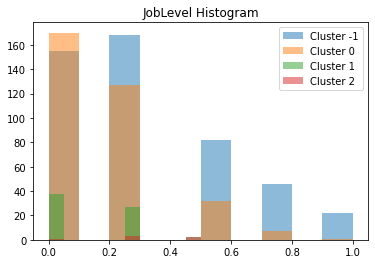

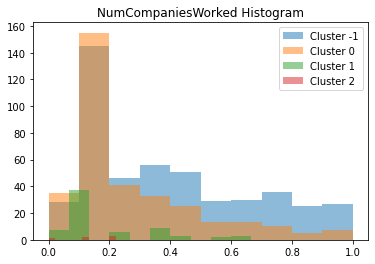

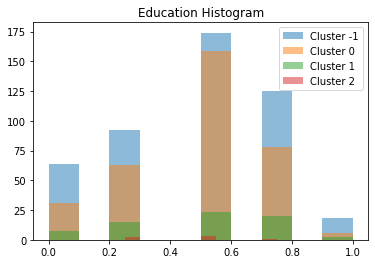

In [83]:
for column in df.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df['LABEL']):
            plt.hist(df[df['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

# Computes the Davies-Bouldin score

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering.
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
The minimum score is zero, with lower values indicating better clustering.

In [22]:
from sklearn.metrics import davies_bouldin_score
separation = davies_bouldin_score(df, df["LABEL"])
print(separation)

1.2346986679735976


# Compute Silhouette score

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [23]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df, df["LABEL"])
print(silhouette)

0.2523411081010567


# Compute the Calinski-Harabasz score

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters.In normal usage, the Calinski-Harabasz index is applied to the results of a cluster analysis.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

The score is fast to compute.The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [24]:
from sklearn.metrics import calinski_harabasz_score
labels = dbscan.labels_
density = calinski_harabasz_score(df, labels)
print(density)

194.01068696180252


# DBSCAN  WITH eps= 0.7  e min= 7


In [25]:
df1 = pd.read_csv(TR_file, sep=",")

In [26]:
del df1['Attrition']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [27]:
# Compute DBSCAN
dbscan1 = DBSCAN(eps=0.7, min_samples=7).fit(df1)

labels1 = dbscan1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
    


Estimated number of clusters: 2
Estimated number of noise points: 188


In [28]:
dbscan1.labels_

array([ 0, -1, -1,  0,  0,  0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0, -1,  1,  0,  0,  1, -1,
        1,  0,  1, -1, -1, -1,  1,  0,  1,  0,  0,  1,  0,  0, -1,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,  0, -1, -1,  0,  1,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  1, -1,  0,  0,  0, -1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,
        0,  1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  1, -1,
        0,  1,  1, -1, -1,  0,  0, -1, -1,  0,  0,  1,  0, -1, -1,  0, -1,
        0,  0,  0,  0, -1,  1,  0,  1,  1,  0,  0,  0,  0, -1,  1,  0, -1,
        0,  0,  0,  1,  1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  1,  1,
        0, -1,  1,  0,  1,  0,  0,  0,  0, -1,  0, -1, -1,  1, -1,  0,  0,
       -1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0, -1, -1,
       -1,  0, -1,  0,  1

In [29]:
np.unique(dbscan1.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([188, 537, 158], dtype=int64))

In [30]:
df1["LABEL"] = labels1

In [31]:
df1.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,0
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,-1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,-1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,0
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,0
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,-1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,0


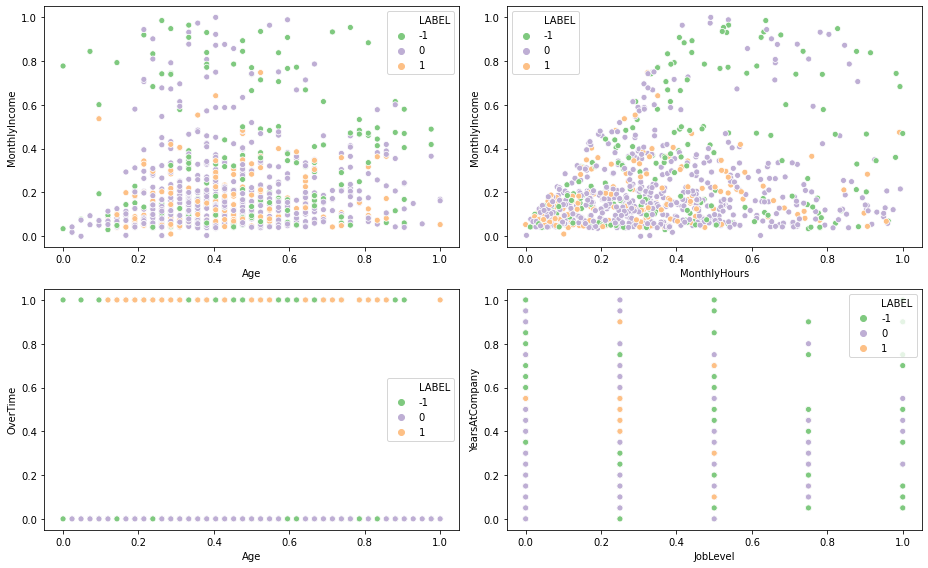

In [32]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df1, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df1, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df1, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df1, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

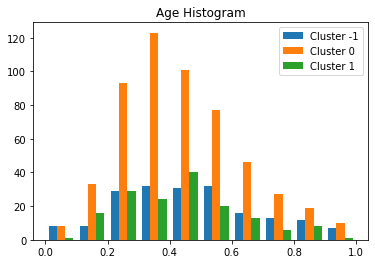

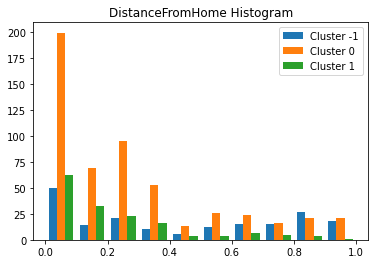

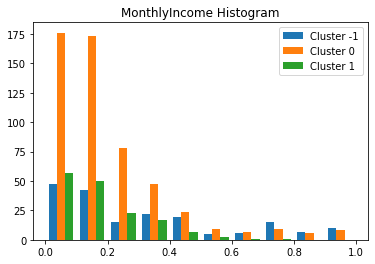

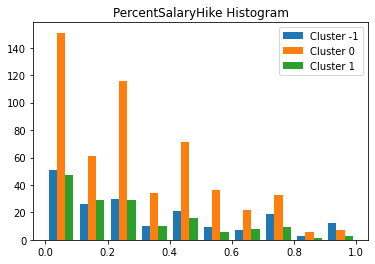

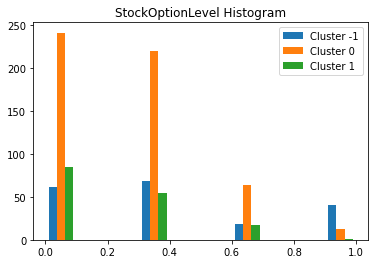

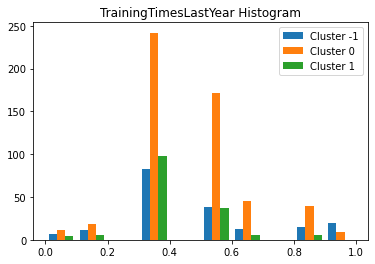

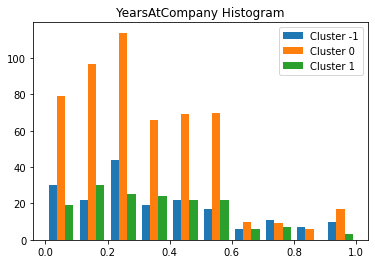

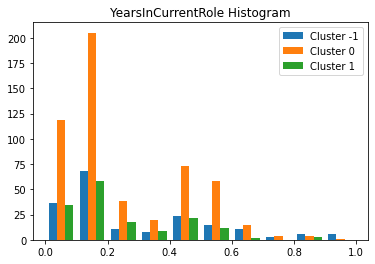

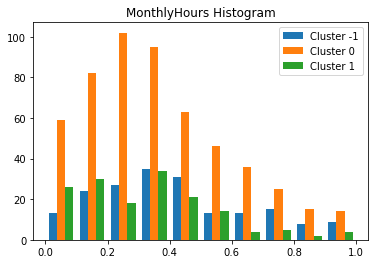

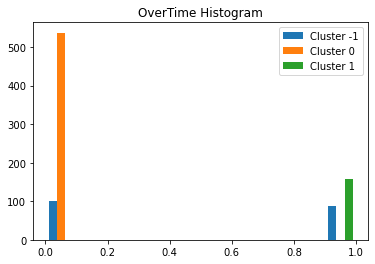

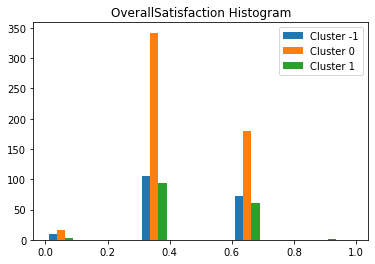

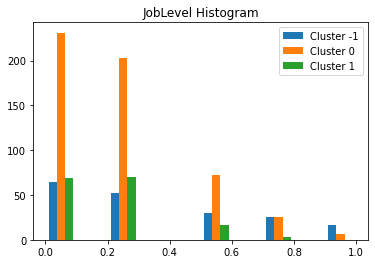

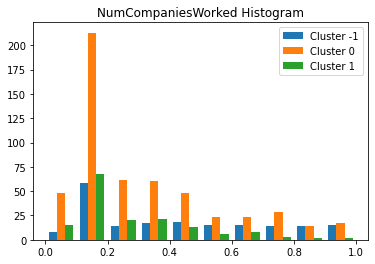

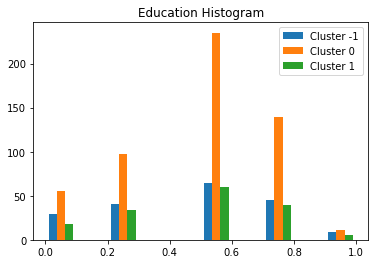

In [84]:
for column in df1.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df1['LABEL']):
            cluster_list.append(df1[df1['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

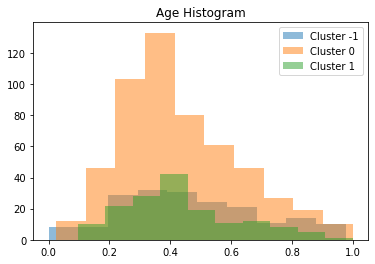

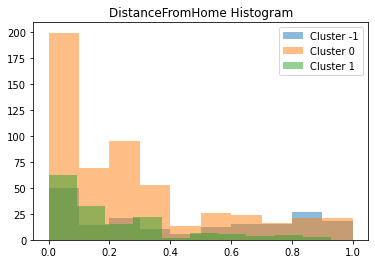

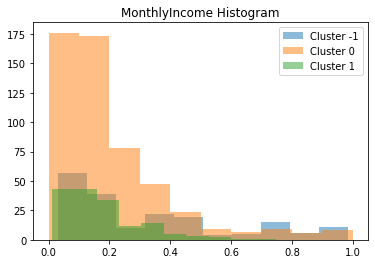

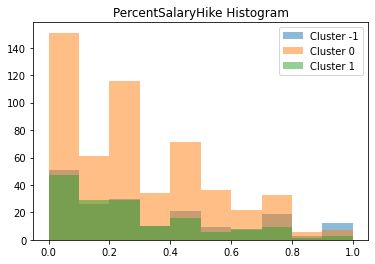

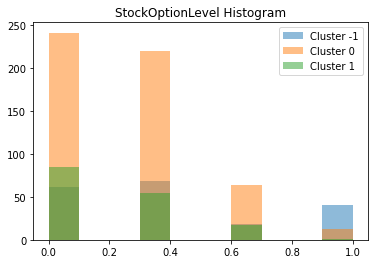

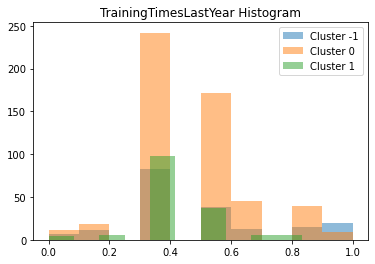

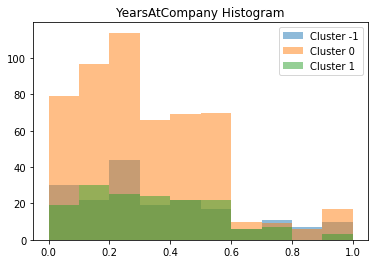

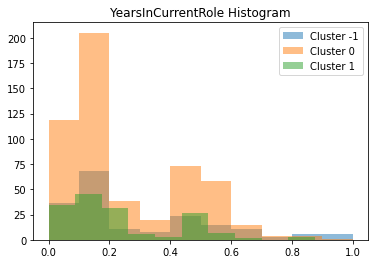

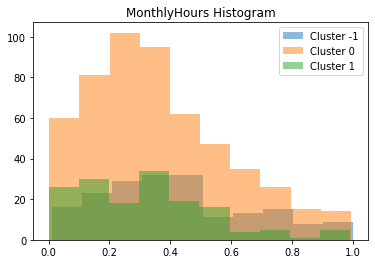

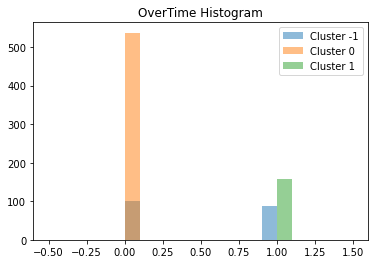

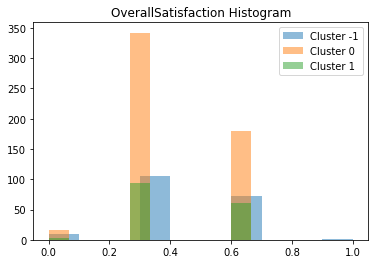

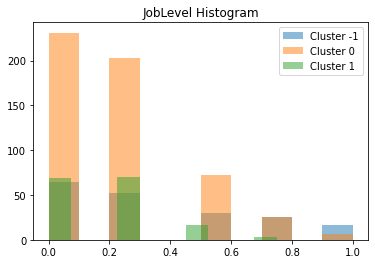

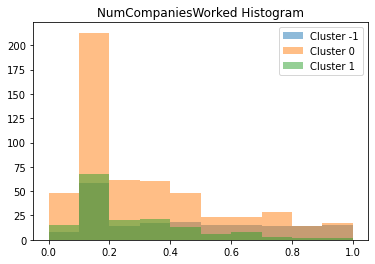

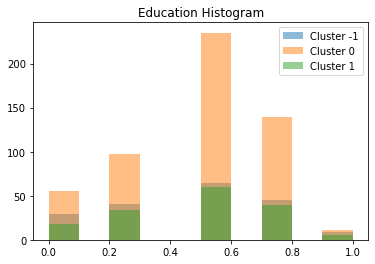

In [85]:
for column in df1.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df1['LABEL']):
            plt.hist(df1[df1['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

In [33]:
from sklearn.metrics import davies_bouldin_score
separation1 = davies_bouldin_score(df1, df1["LABEL"])
print(separation1)

1.467726426931934


In [34]:
from sklearn.metrics import silhouette_score
silhouette1 = silhouette_score(df1, df1["LABEL"])
print(silhouette1)

0.3245954889799621


In [35]:
from sklearn.metrics import calinski_harabasz_score
labels1 = dbscan1.labels_
density1 = calinski_harabasz_score(df1, labels1)
print(density1)

321.792376239469


# DBSCAN  WITH eps= 0.8  e min= 7

In [36]:
df2 = pd.read_csv(TR_file, sep=",")

In [37]:
del df2['Attrition']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [38]:
# Compute DBSCAN
dbscan2 = DBSCAN(eps=0.8, min_samples=7).fit(df2)

labels2 = dbscan2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise_ = list(labels2).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
    


Estimated number of clusters: 2
Estimated number of noise points: 45


In [39]:
dbscan2.labels_

array([ 0,  1, -1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0, -1,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0, -1,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  1,  1,  1,
        0,  1,  1, -1,  0,  0,  0, -1, -1,  0,  0,  1,  0, -1,  1,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0, -1,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0, -1,  0,  1,  0,  0,  0,
       -1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
       -1,  0, -1,  0,  1

In [40]:
np.unique(dbscan2.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([ 45, 617, 221], dtype=int64))

In [41]:
df2["LABEL"] = labels2

In [42]:
df2.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,0
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,-1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,0
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,0
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,0


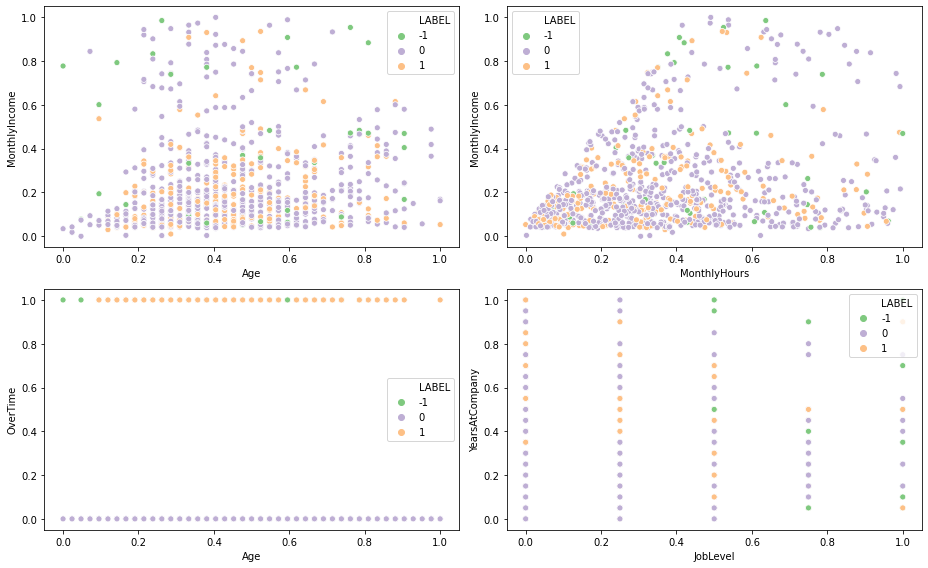

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df2, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df2, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df2, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df2, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

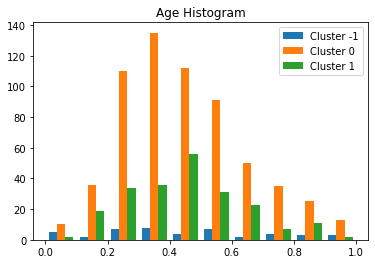

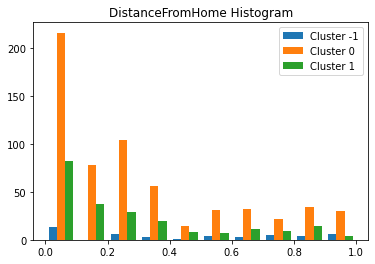

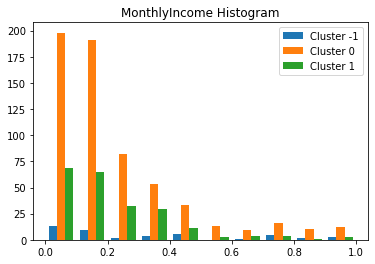

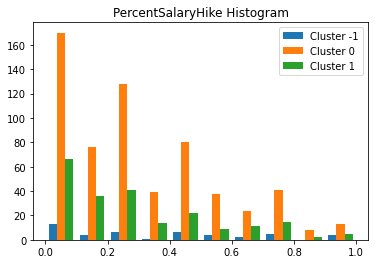

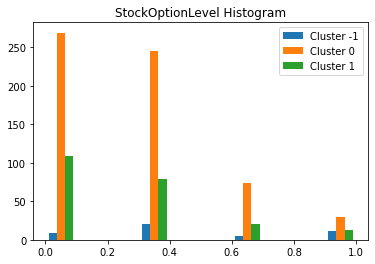

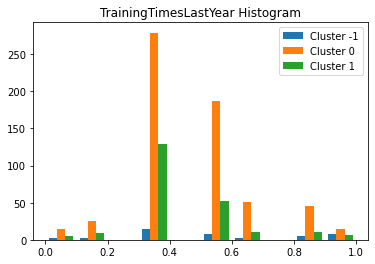

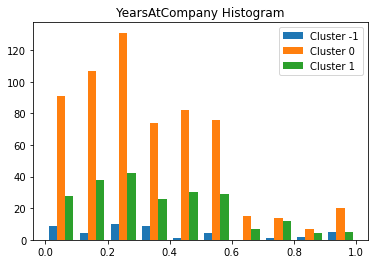

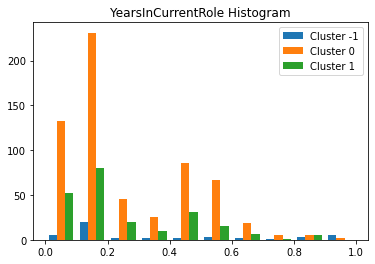

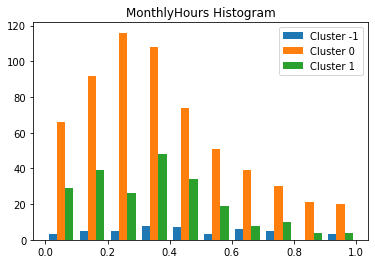

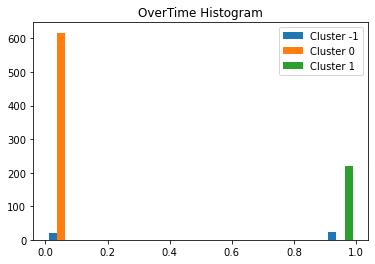

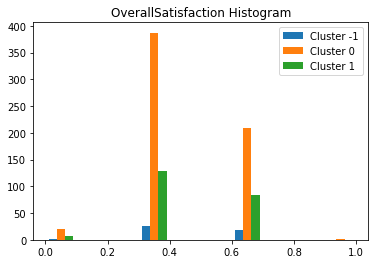

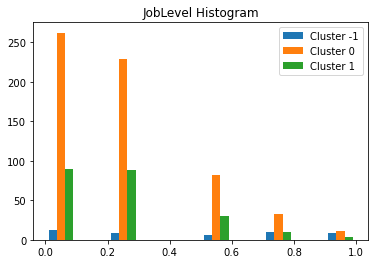

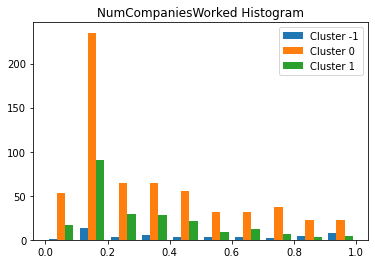

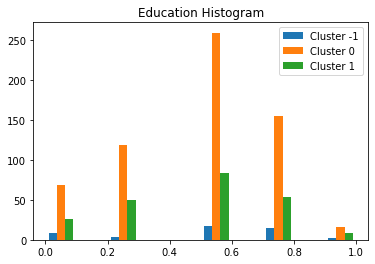

In [86]:
for column in df2.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df2['LABEL']):
            cluster_list.append(df2[df2['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

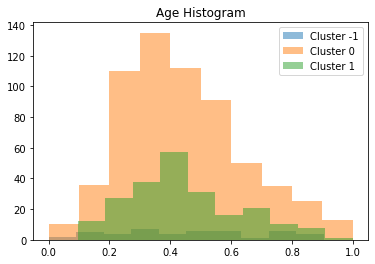

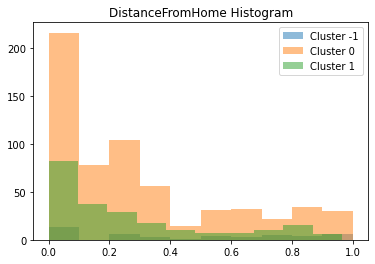

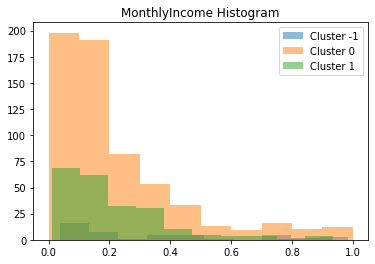

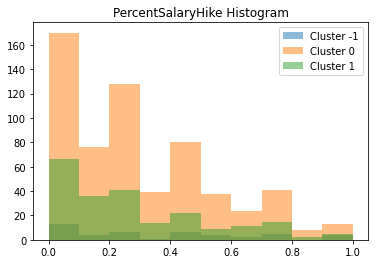

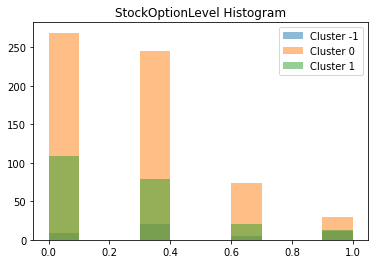

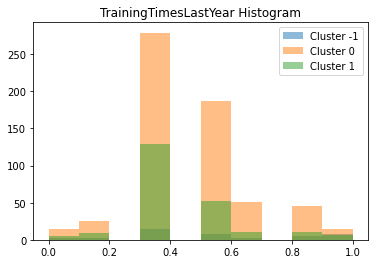

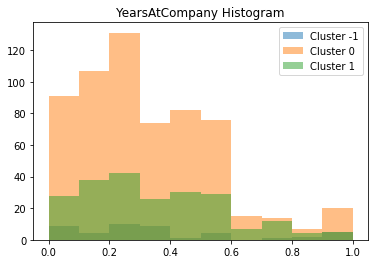

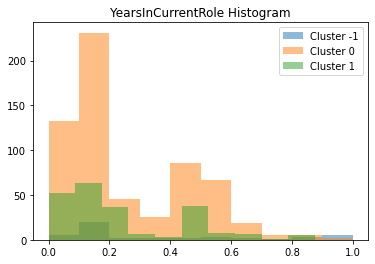

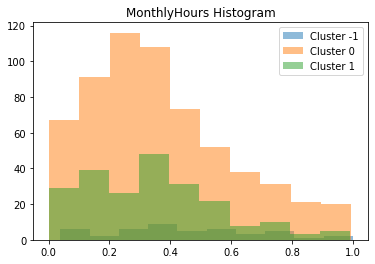

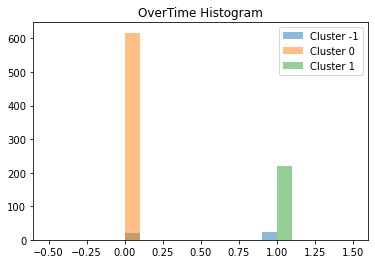

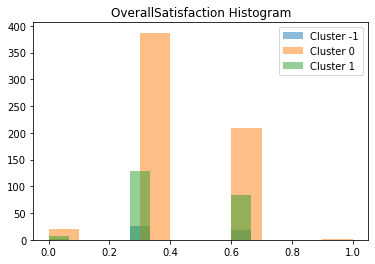

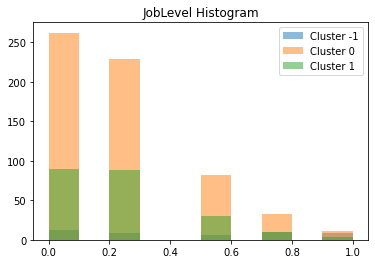

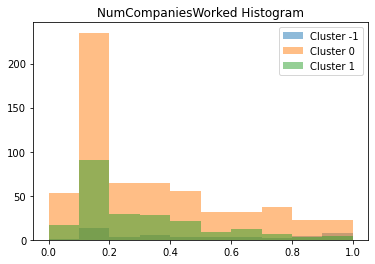

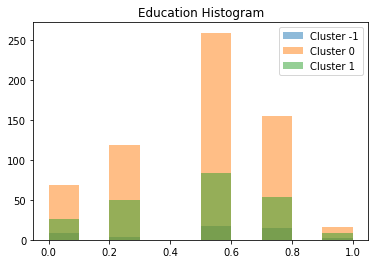

In [87]:
for column in df2.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df2['LABEL']):
            plt.hist(df2[df2['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

In [44]:
from sklearn.metrics import davies_bouldin_score
separation2 = davies_bouldin_score(df2, df2["LABEL"])
print(separation2)

1.4941809864181972


In [45]:
from sklearn.metrics import silhouette_score
silhouette2 = silhouette_score(df2, df2["LABEL"])
print(silhouette2)

0.3526806571735914


In [46]:
from sklearn.metrics import calinski_harabasz_score
labels2 = dbscan2.labels_
density2 = calinski_harabasz_score(df2, labels2)
print(density2)

273.0260499583046


# DBSCAN WITH eps= 0.9 e min= 7

In [47]:
df3 = pd.read_csv(TR_file, sep=",")

In [48]:
del df3['Attrition']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [49]:
# Compute DBSCAN
dbscan3 = DBSCAN(eps=0.9, min_samples=7).fit(df3)

labels3 = dbscan3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_noise_ = list(labels3).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
    

Estimated number of clusters: 2
Estimated number of noise points: 5


In [50]:
dbscan3.labels_

array([ 0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1

In [51]:
np.unique(dbscan3.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([  5, 638, 240], dtype=int64))

In [52]:
df3["LABEL"] = labels3

In [53]:
df3.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,0
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,0
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,0
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,0


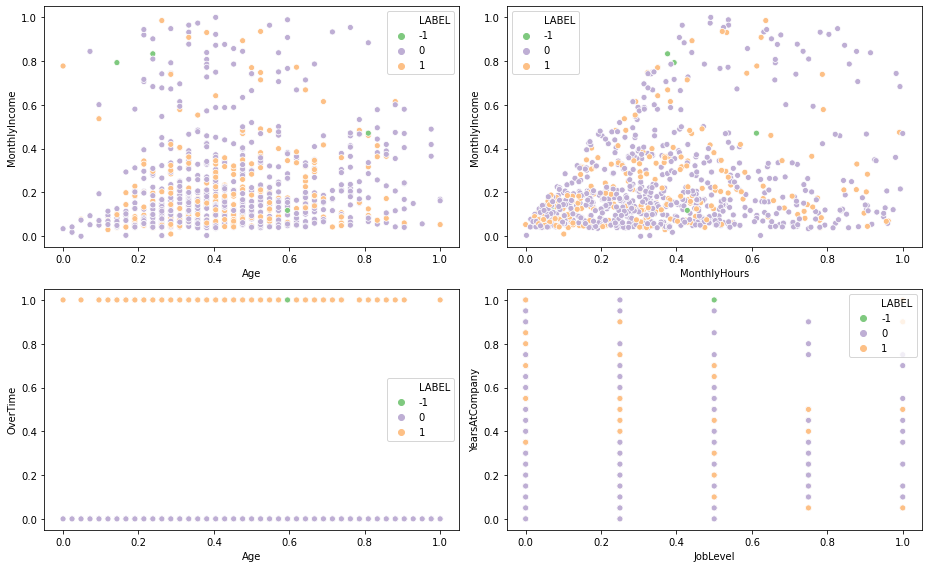

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df3, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df3, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df3, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df3, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

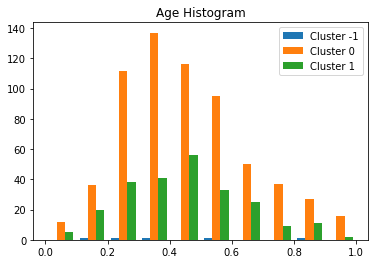

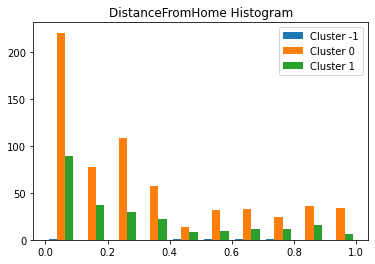

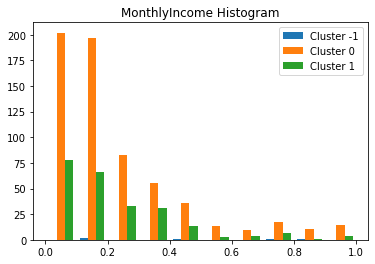

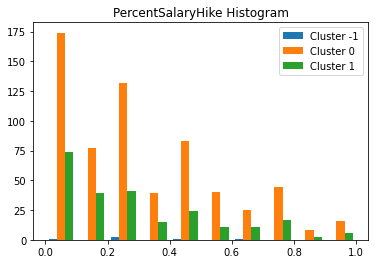

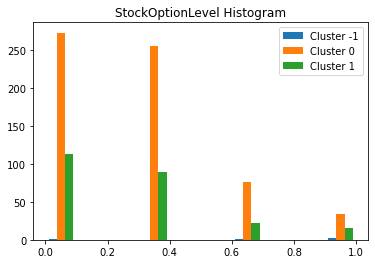

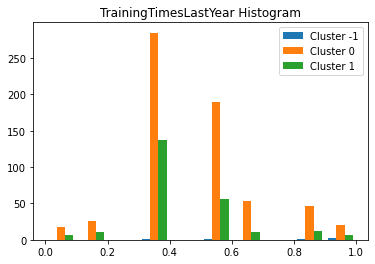

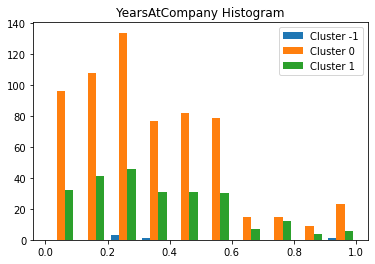

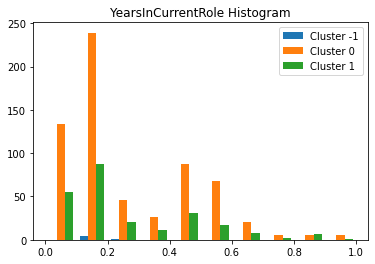

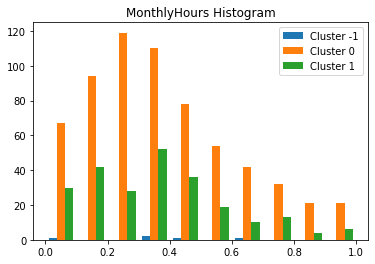

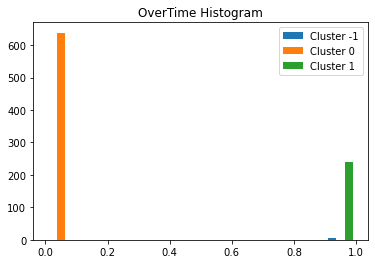

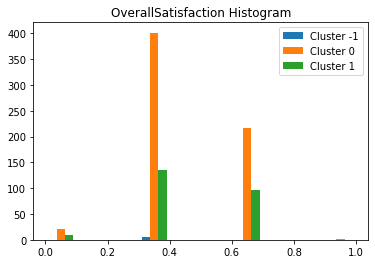

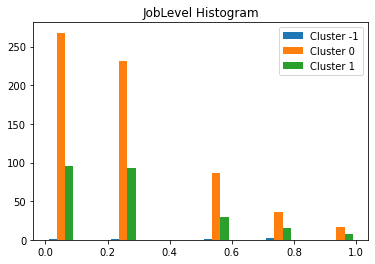

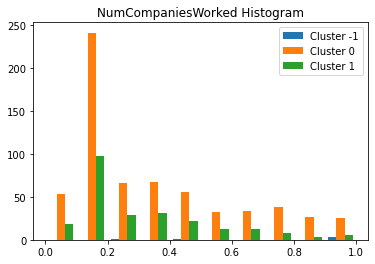

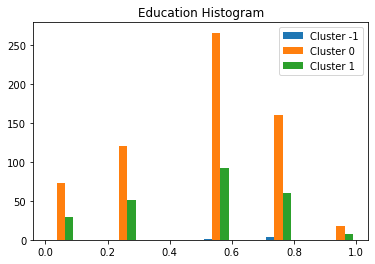

In [88]:
for column in df3.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df3['LABEL']):
            cluster_list.append(df3[df3['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

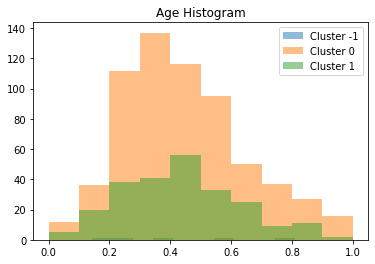

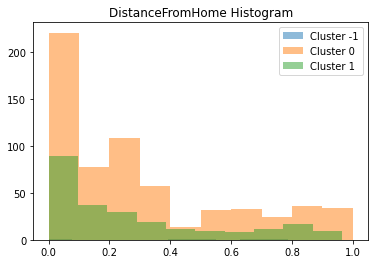

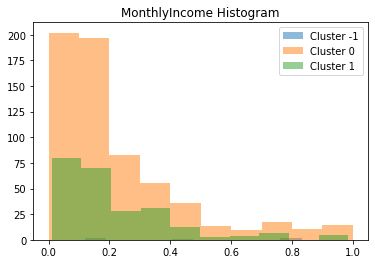

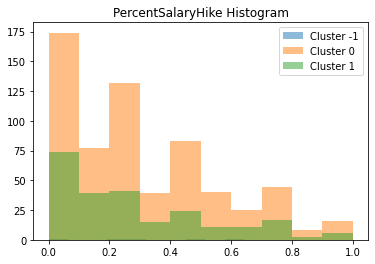

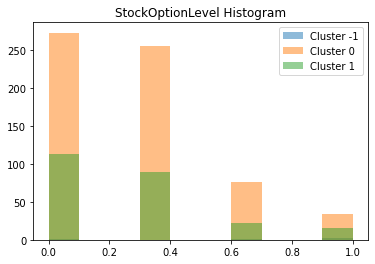

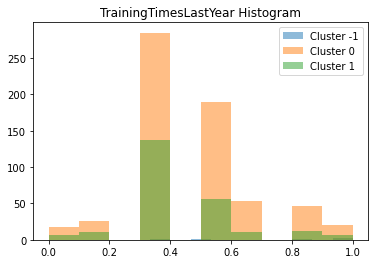

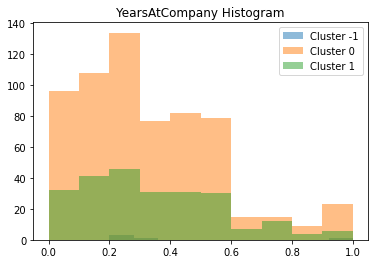

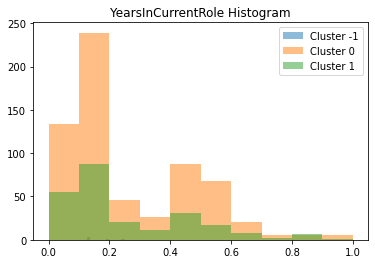

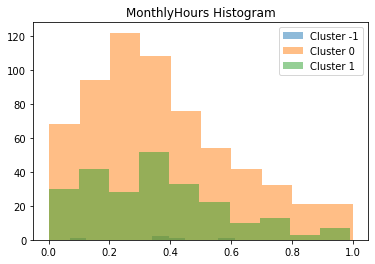

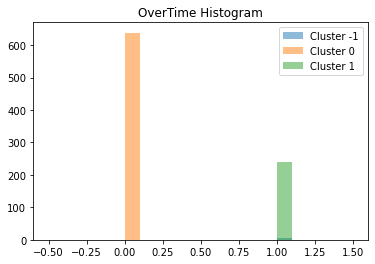

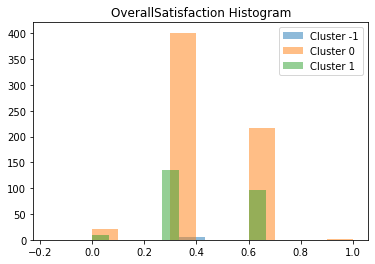

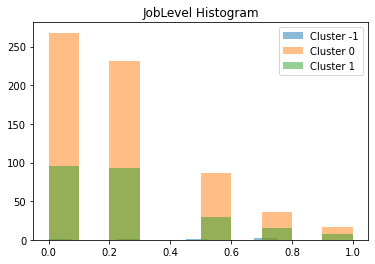

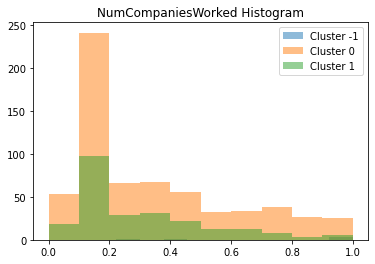

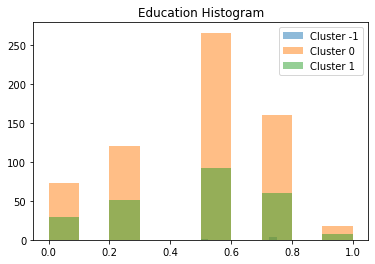

In [89]:
for column in df3.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df3['LABEL']):
            plt.hist(df3[df3['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

In [55]:
from sklearn.metrics import davies_bouldin_score
separation3 = davies_bouldin_score(df3, df3["LABEL"])
print(separation3)

1.1406280592697102


In [56]:
from sklearn.metrics import silhouette_score
silhouette3 = silhouette_score(df3, df3["LABEL"])
print(silhouette3)

0.36000268003439356


In [57]:
from sklearn.metrics import calinski_harabasz_score
labels3 = dbscan3.labels_
density3 = calinski_harabasz_score(df3, labels3)
print(density3)

246.05401171133704


# DBSCAN WITH eps= 0.5 e min= 7

In [58]:
df4 = pd.read_csv(TR_file, sep=",")

In [59]:
del df4['Attrition']
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [60]:
# Compute DBSCAN
dbscan4 = DBSCAN(eps=0.5, min_samples=7).fit(df4)

labels4 = dbscan4.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels4)) - (1 if -1 in labels4 else 0)
n_noise_ = list(labels4).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 751


In [61]:
dbscan4.labels_

array([-1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1,  0, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1,
       -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1

In [62]:
np.unique(dbscan4.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([751, 121,  11], dtype=int64))

In [63]:
df4["LABEL"] = labels4

In [64]:
df4.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,-1
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,-1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,-1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,-1
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,-1
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,-1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,-1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,-1


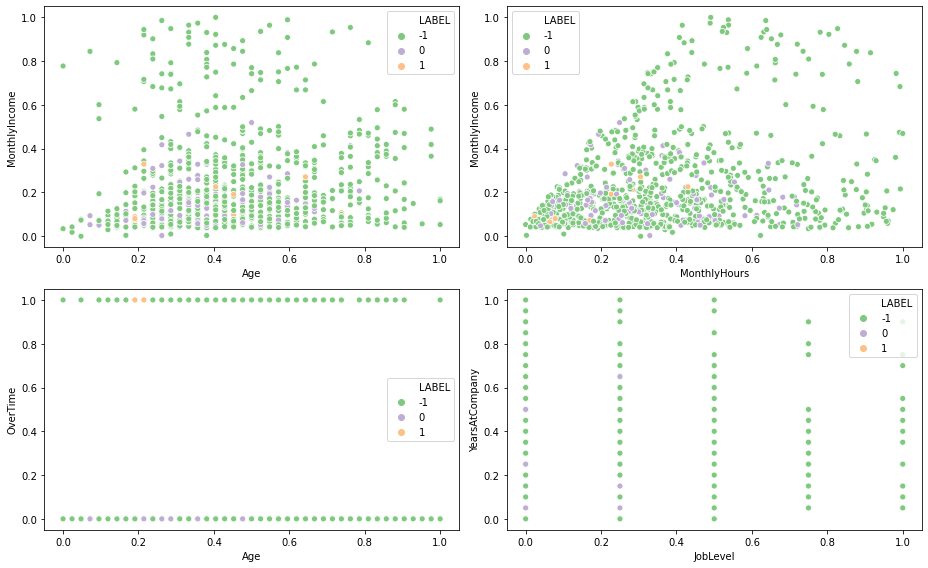

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df4, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df4, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df4, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df4, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

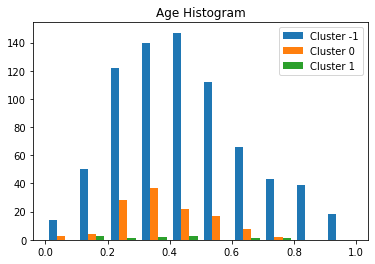

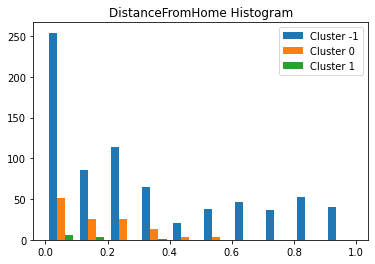

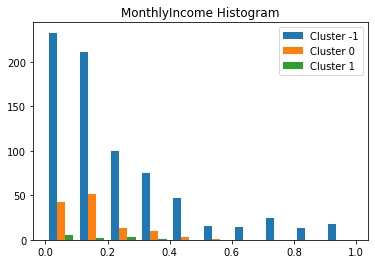

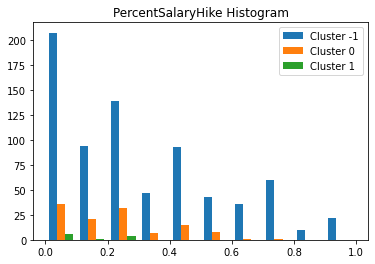

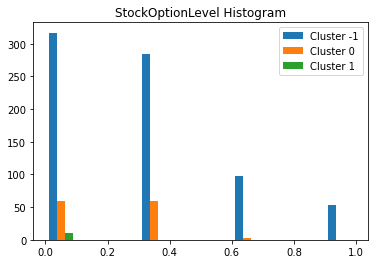

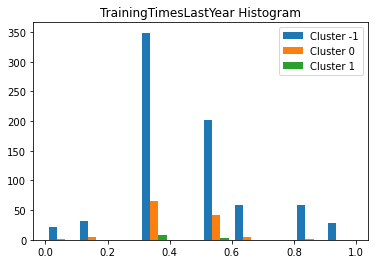

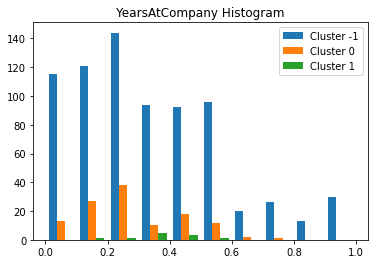

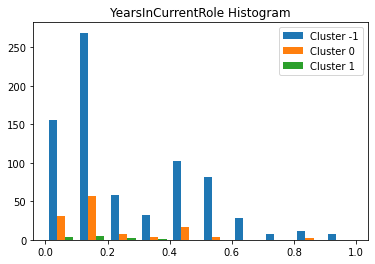

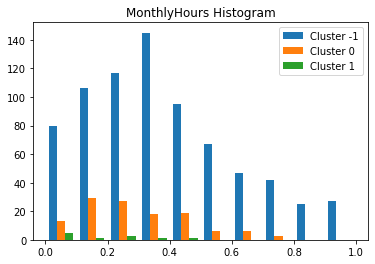

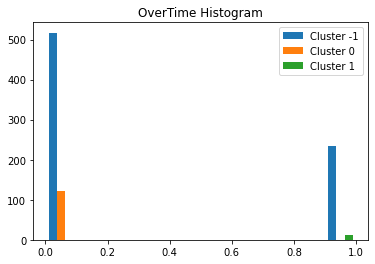

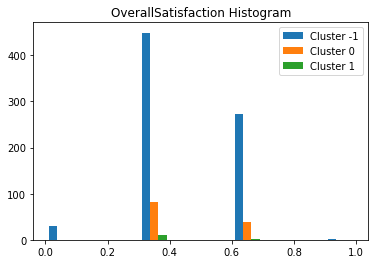

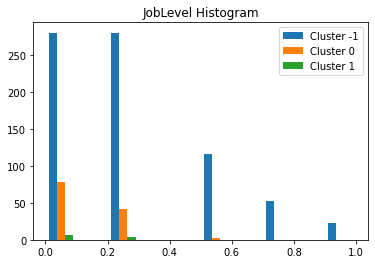

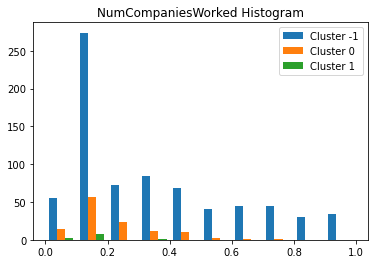

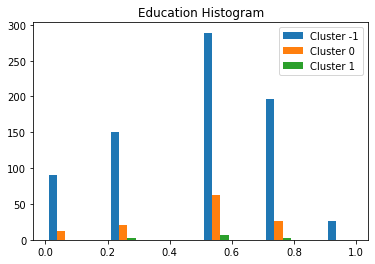

In [90]:
for column in df4.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df4['LABEL']):
            cluster_list.append(df4[df4['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

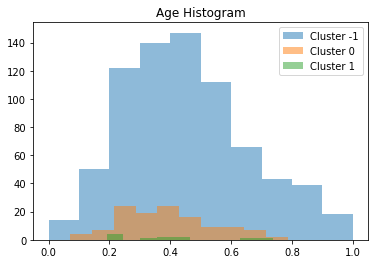

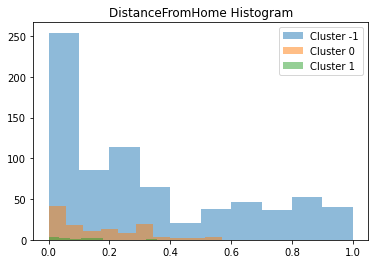

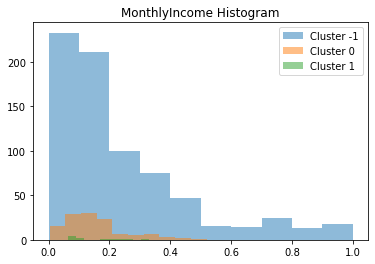

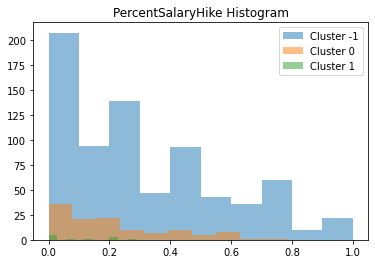

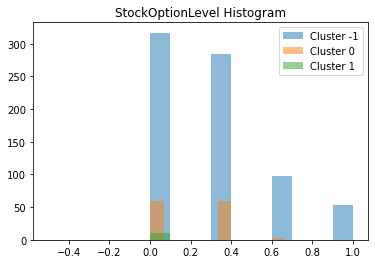

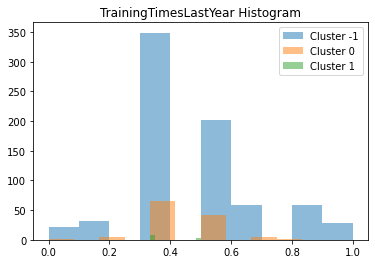

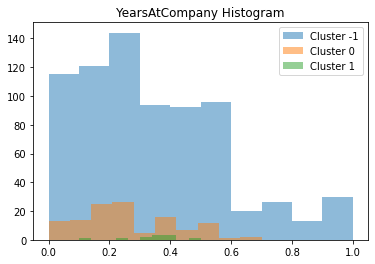

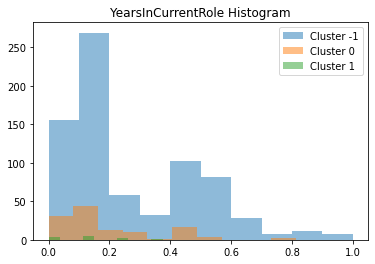

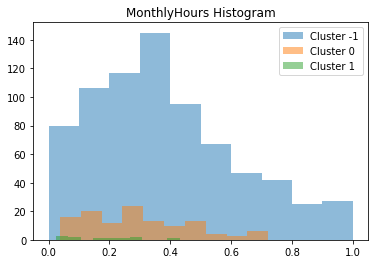

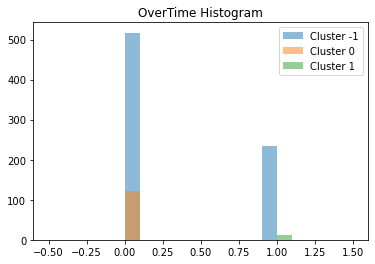

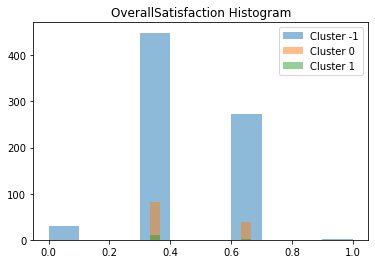

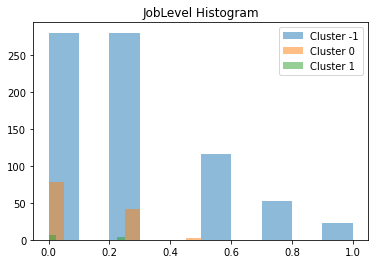

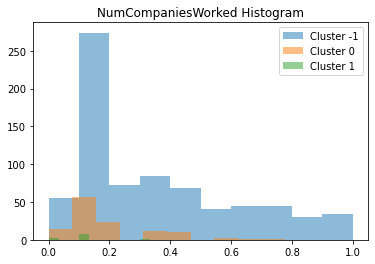

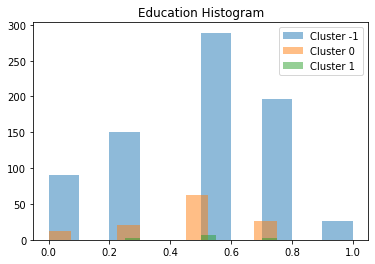

In [91]:
for column in df4.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df4['LABEL']):
            plt.hist(df4[df4['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

In [66]:
from sklearn.metrics import davies_bouldin_score
separation4 = davies_bouldin_score(df4, df4["LABEL"])
print(separation4)

1.1542794983131688


In [67]:
from sklearn.metrics import silhouette_score
silhouette4 = silhouette_score(df4, df4["LABEL"])
print(silhouette3)

0.36000268003439356


In [68]:
from sklearn.metrics import calinski_harabasz_score
labels4 = dbscan4.labels_
density4 = calinski_harabasz_score(df4, labels4)
print(density4)

95.49439322892529


# DBSCAN WITH eps= 1.0 e min= 7

In [69]:
df5 = pd.read_csv(TR_file, sep=",")

In [70]:
del df5['Attrition']
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   OverTime               883 non-null    float64
 10  OverallSatisfaction    883 non-null    float64
 11  JobLevel               883 non-null    float64
 12  NumCompaniesWorked     883 non-null    float64
 13  Education              883 non-null    float64
dtypes: float64(14)
memory usage: 96.7 KB


In [71]:
# Compute DBSCAN
dbscan5 = DBSCAN(eps=1.0, min_samples=7).fit(df5)

labels5 = dbscan5.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_noise_ = list(labels5).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


In [72]:
dbscan5.labels_

array([ 0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  1,
        0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,
        0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  1

In [73]:
np.unique(dbscan5.labels_,return_counts = True)

(array([-1,  0,  1], dtype=int64), array([  1, 638, 244], dtype=int64))

In [74]:
df5["LABEL"] = labels5

In [75]:
df5.head(15)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education,LABEL
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.333333,0.50,1.000000,0.75,0
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,1.0,0.333333,1.00,0.111111,0.00,1
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,1.0,0.666667,0.25,0.111111,0.50,1
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.333333,0.00,0.222222,0.75,0
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.666667,0.00,0.111111,0.25,0
5,0.404762,0.214286,0.048484,0.000000,1.000000,0.333333,0.05,0.1250,0.442950,0.0,0.666667,0.00,0.111111,0.50,0
6,0.214286,0.107143,0.296945,0.000000,0.333333,0.000000,0.45,0.1875,0.617375,0.0,0.333333,0.00,0.222222,0.25,0
7,0.119048,0.071429,0.030052,0.642857,0.666667,0.333333,0.05,0.3125,0.369579,1.0,0.666667,0.25,0.111111,0.00,1
8,0.571429,0.571429,0.091042,0.142857,0.000000,0.333333,0.15,0.1250,0.450738,1.0,0.666667,0.25,0.333333,0.25,1
9,0.404762,1.000000,0.064684,0.142857,0.333333,0.833333,0.05,0.5000,0.167150,0.0,0.333333,0.25,0.111111,0.50,0


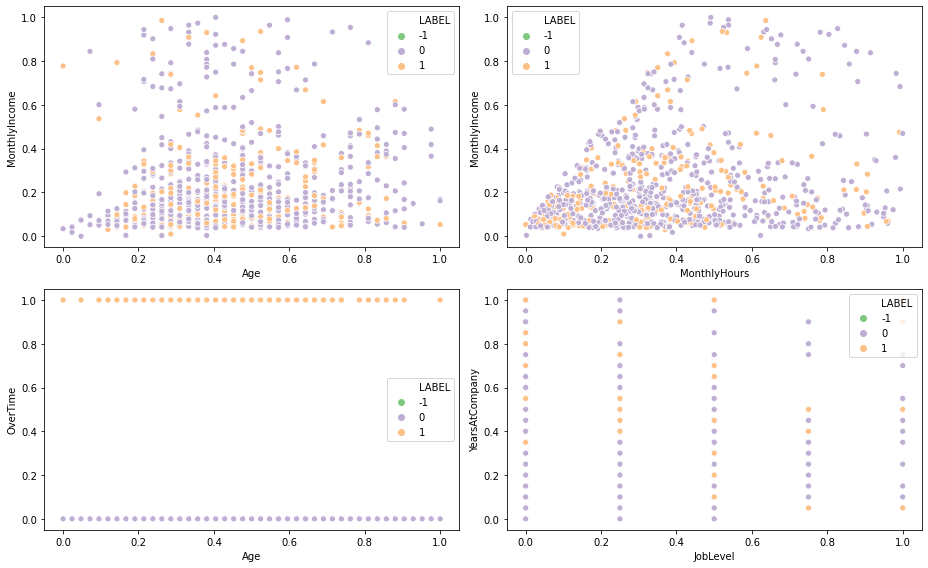

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "MonthlyIncome", data = df5, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "MonthlyHours", y = "MonthlyIncome", data = df5, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "Age", y = "OverTime", data = df5, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "JobLevel", y = "YearsAtCompany", data = df5, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

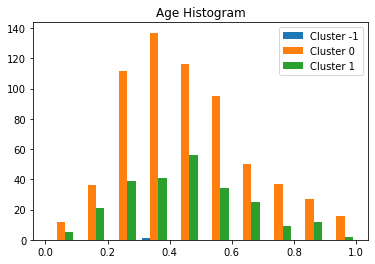

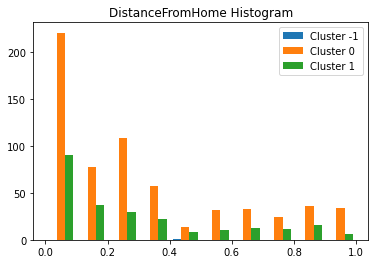

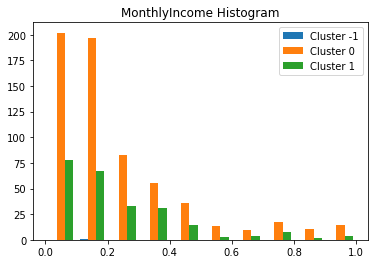

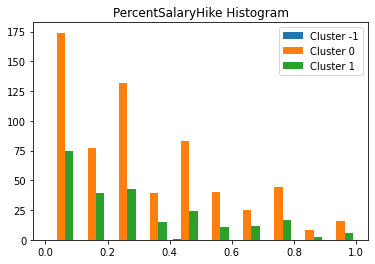

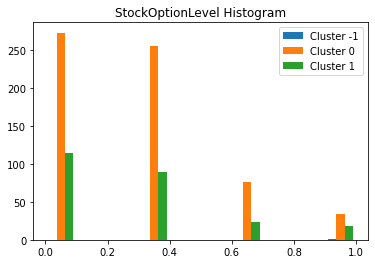

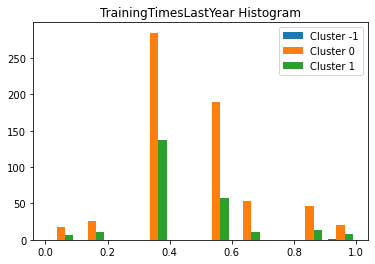

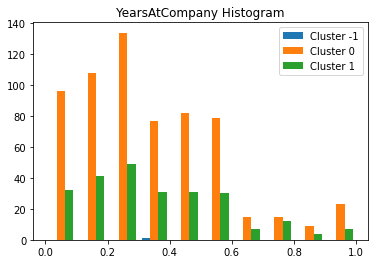

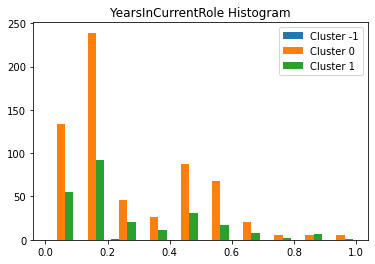

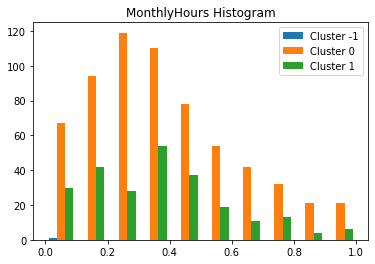

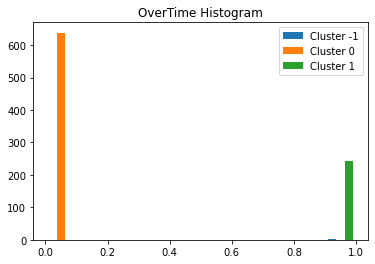

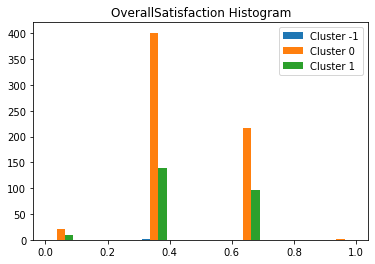

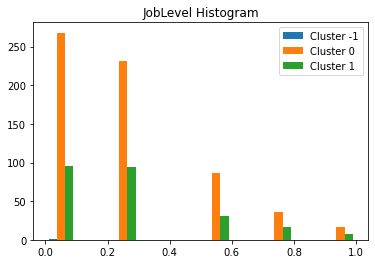

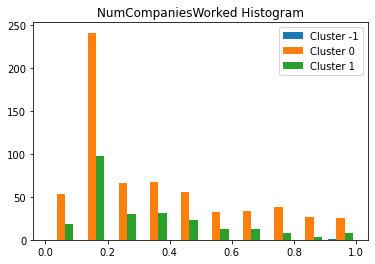

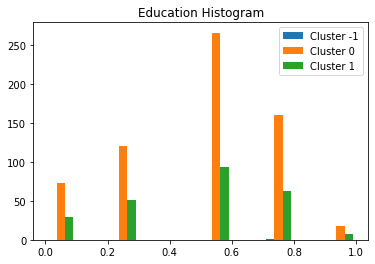

In [92]:
for column in df5.columns:
    if column != 'LABEL':
        cluster_list = []
        list_num_cluster = []

        for num_cluster in np.unique(df5['LABEL']):
            cluster_list.append(df5[df5['LABEL'] == num_cluster][column])  #distribution
            list_num_cluster.append('Cluster %s' % num_cluster)           #num cluster

        plt.hist(cluster_list, label = list_num_cluster)
        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

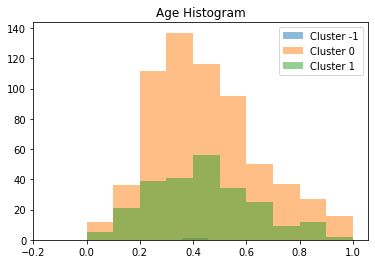

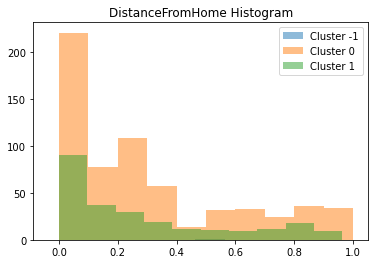

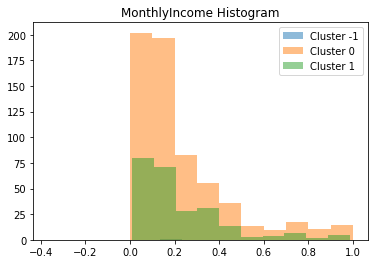

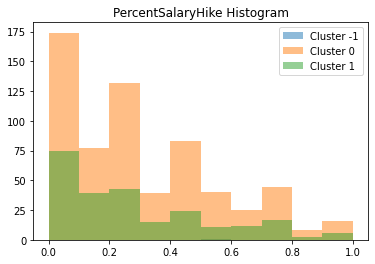

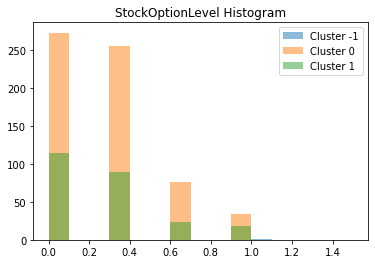

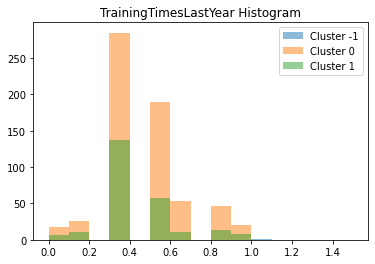

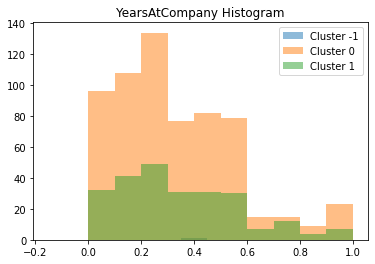

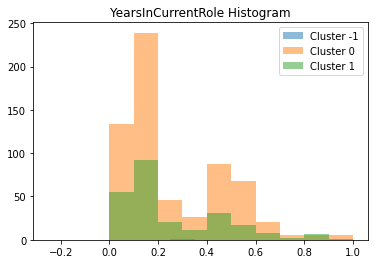

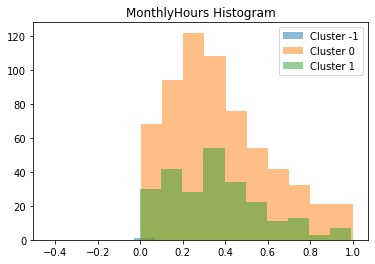

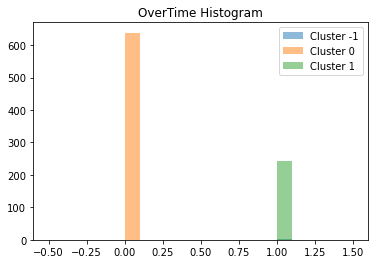

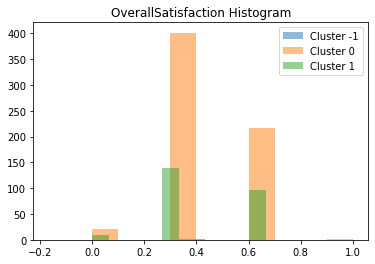

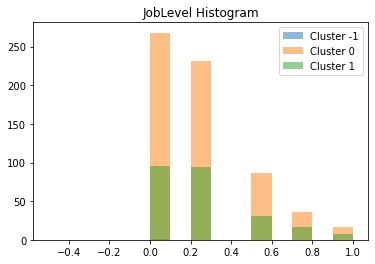

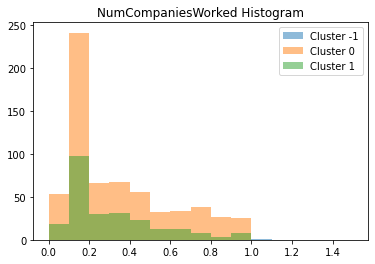

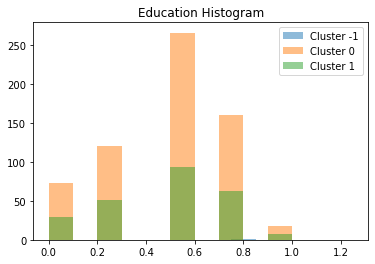

In [93]:
for column in df5.columns:
    if column != 'LABEL':
    
        for num_cluster in np.unique(df5['LABEL']):
            plt.hist(df5[df5['LABEL'] == num_cluster][column], 
                     alpha = 0.5, label = 'Cluster %s' % num_cluster)       

        plt.legend(loc='upper right')
        plt.title(column + " Histogram")               
        plt.show()

In [77]:
from sklearn.metrics import davies_bouldin_score
separation5  = davies_bouldin_score(df5, df5["LABEL"])
print(separation5)

0.9379424827223716


In [78]:
from sklearn.metrics import silhouette_score
silhouette5 = silhouette_score(df5, df5["LABEL"])
print(silhouette5)

0.35692629483666805


In [79]:
from sklearn.metrics import calinski_harabasz_score
labels5 = dbscan5.labels_
density5 = calinski_harabasz_score(df5, labels5)
print(density5)

240.97436413938132
